In [1]:
import json 
import pandas as pd

file=open('stocks','r')
stockDict=json.load(file)
stocks=pd.DataFrame(stockDict['pageProps']['stocks'])
stocks.columns=['ticker','name','industry','market_cap']
stocks

,ticker,name,industry,market_cap
0,A,Agilent Technologies,Life Sciences Tools & Services,39663333337
1,AA,Alcoa,Metals & Mining,14396619765
2,AAC,Ares Acquisition,Blank Check / SPAC,1461750009
3,AACG,ATA Creativity Global,Diversified Consumer Services,43613891
4,AACI,Armada Acquisition I,Blank Check / SPAC,203574375
...,...,...,...,...
6255,ZWS,Zurn Water Solutions,Utilities-Regulated Water,4197345273
6256,ZY,Zymergen,Chemicals,402435933
6257,ZYME,Zymeworks,Biotechnology,413489020
6258,ZYNE,Zynerba Pharmaceuticals,Pharmaceuticals,102219400


In [2]:
import yfinance as yf

tickers=' '.join(stocks.sort_values('market_cap',ascending=False).iloc[:100].ticker)
data=yf.download(tickers=tickers,period='10y',interval='1d',auto_adjust=True)
data

[*********************100%***********************]  100 of 100 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BRK.A: No data found, symbol may be delisted


Adj Close             Close                                      \
               BRK.A BRK.B        AAPL        ABBV        ABNB         ABT   
Date                                                                         
2012-02-21       NaN   NaN   15.744738         NaN         NaN   22.065088   
2012-02-22       NaN   NaN   15.689387         NaN         NaN   22.092596   
2012-02-23       NaN   NaN   15.791832         NaN         NaN   22.116167   
2012-02-24       NaN   NaN   15.975932         NaN         NaN   22.277252   
2012-02-27       NaN   NaN   16.078384         NaN         NaN   22.237967   
...              ...   ...         ...         ...         ...         ...   
2022-02-14       NaN   NaN  168.880005  143.000000  169.660004  122.779999   
2022-02-15       NaN   NaN  172.789993  144.759995  180.070007  123.980003   
2022-02-16       NaN   NaN  172.550003  145.869995  186.639999  123.680000   
2022-02-17       NaN   NaN  168.880005  144.970001  183.600006  120.580002   
2022-02-18       NaN   NaN  167.300003  144.029999  174.899994  116.790001   

                                                            ...   Volume  \
                   ACN        ADBE        AMAT         AMD  ...      TXN   
Date                                                        ...            
2012-02-21   47.881710   32.540001   10.716327    7.280000  ...  6831500   
2012-02-22   48.202892   32.330002   10.876522    7.140000  ...  6498700   
2012-02-23   48.927624   32.970001   10.741619    7.290000  ...  5775600   
2012-02-24   49.125282   33.410000   10.648872    7.460000  ...  3609200   
2012-02-27   49.133511   33.270000   10.564558    7.470000  ...  5986000   
...                ...         ...         ...         ...  ...      ...   
2022-02-14  326.130005  474.010010  131.860001  114.269997  ...  7468000   
2022-02-15  329.410004  479.500000  139.839996  121.470001  ...  6970000   
2022-02-16  333.720001  477.700012  140.960007  117.690002  ...  4594300   
2022-02-17  322.910004  457.709991  136.470001  112.370003  ...  6807700   
2022-02-18  321.179993  442.559998  133.350006  113.830002  ...  6359100   

                                                                              \
                 UL      UNH      UNP      UPS         V        VZ       WFC   
Date                                                                           
2012-02-21   694900  7502200  6203000  3652400  10819600  12025500  29334500   
2012-02-22   678500  6760100  4760600  3284900  14381200   9565600  29074600   
2012-02-23   752700  7195800  5307800  3018200  10890800  14270700  23327000   
2012-02-24  1047000  5004500  3978800  3575300  11094000   9693000  21604000   
2012-02-27   704100  5355900  3763600  3439000  15812800  14543700  36242500   
...             ...      ...      ...      ...       ...       ...       ...   
2022-02-14  2834400  2549500  2429400  3641400   8280800  16081700  32680500   
2022-02-15  3090900  3001000  3248800  3149000   9462000  12828000  18230300   
2022-02-16  1991500  2651800  3493100  2226700   9561300  17277700  22057200   
2022-02-17  2483500  2403100  2697500  2815600   8131200  17462500  24946500   
2022-02-18  2019200  2991100  3316100  2823900   8118800  20296800  22132900   

                                
                 WMT       XOM  
Date                            
2012-02-21  23894800  15481300  
2012-02-22  28630200  11983200  
2012-02-23  14880300  12404600  
2012-02-24   9925900  10767100  
2012-02-27  12258800  13323500  
...              ...       ...  
2022-02-14   9787800  34652800  
2022-02-15   7282800  25089500  
2022-02-16   9496900  21733800  
2022-02-17  17943800  23738800  
2022-02-18  10364700  23378700  

[2518 rows x 502 columns]

In [3]:
l=[{'ticker':ticker,'n':len(data['Close'][ticker].dropna())}for ticker in data['Close'].columns]
df=pd.DataFrame(l)
df

,ticker,n
0,AAPL,2518
1,ABBV,2301
2,ABNB,301
3,ABT,2518
4,ACN,2518
...,...,...
95,V,2518
96,VZ,2518
97,WFC,2518
98,WMT,2518


<AxesSubplot:>

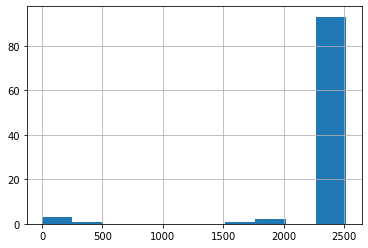

In [4]:
df.n.hist()

In [5]:
largeTickers=df[df.n>1000].ticker
largeCap=data['Close'][largeTickers]
largeCap

,AAPL,ABBV,ABT,ACN,ADBE,AMAT,AMD,AMGN,AMZN,ASML,...,TXN,UL,UNH,UNP,UPS,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-21,15.744738,NaN,22.065088,47.881710,32.540001,10.716327,7.280000,51.940601,182.259995,33.444141,...,25.562460,23.807947,47.345592,45.159241,56.939114,26.625946,24.579195,23.154430,47.690166,57.154263
2012-02-22,15.689387,NaN,22.092596,48.202892,32.330002,10.876522,7.140000,52.018497,180.580002,33.270393,...,25.316664,23.771683,47.225754,45.280437,56.566460,27.129547,24.400393,22.877716,46.523129,57.385330
2012-02-23,15.791832,NaN,22.116167,48.927624,32.970001,10.741619,7.290000,52.446842,178.889999,33.480331,...,25.593182,23.981987,47.020378,45.227924,57.117970,27.157532,24.349306,22.922586,46.475494,57.451359
2012-02-24,15.975932,NaN,22.277252,49.125282,33.410000,10.648872,7.460000,52.750603,179.130005,33.523769,...,25.593182,23.684656,47.628025,45.498600,57.013626,27.404661,24.355688,22.571087,46.673958,57.662609
2012-02-27,16.078384,NaN,22.237967,49.133511,33.270000,10.564558,7.470000,52.524746,178.529999,33.350033,...,25.431881,23.583134,47.696503,45.791027,57.214855,27.246119,24.349306,23.206783,46.411976,57.590012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,168.880005,143.000000,122.779999,326.130005,474.010010,131.860001,114.269997,224.270004,3103.340088,627.909973,...,162.470001,51.599998,474.399994,242.550003,212.446350,225.339996,53.270000,57.849998,133.949997,78.980003
2022-02-15,172.789993,144.759995,123.980003,329.410004,479.500000,139.839996,121.470001,223.940002,3130.209961,656.409973,...,166.169998,51.490002,478.230011,249.320007,215.692749,227.820007,53.360001,58.380001,134.369995,77.989998
2022-02-16,172.550003,145.869995,123.680000,333.720001,477.700012,140.960007,117.690002,222.660004,3162.010010,663.859985,...,168.240005,51.880001,480.049988,253.809998,213.756821,228.820007,53.400002,58.139999,133.529999,78.349998


In [6]:
largeCap.to_csv('large_cap.csv')